In [9]:
%load_ext autoreload
%autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
from preprocessing.preprocessors import *

preprocessed_path = "done_data.csv"
data = pd.read_csv(preprocessed_path, index_col=0)
unique_trade_date = data[(data.datadate > 20151001) & (data.datadate <= 20200707)].datadate.unique()
rebalance_window = 63
validation_window = 63
df = data

for i in range(rebalance_window + validation_window, len(unique_trade_date), rebalance_window):
    train = data_split(df, start=20090000, end=unique_trade_date[i - rebalance_window - validation_window])
    print(f'Training split: i={i}, start={train.datadate.min()}, end={train.datadate.max()}')
    break
    

Training split: i=126, start=20090102, end=20151001


In [6]:
from stable_baselines.common.policies import MlpPolicy, MlpLstmPolicy, MlpLnLstmPolicy, FeedForwardPolicy, register_policy
# AR: this is new code
class custom_policy_3x128(FeedForwardPolicy):
    def __init__(self, *args, **kwargs):
        super(custom_policy, self).__init__(
            *args,
            **kwargs,
            net_arch=[dict(pi=[128, 128, 128], vf=[128, 128, 128])],
            feature_extraction='mlp'
        )

In [19]:
import warnings
warnings.filterwarnings('ignore')
from stable_baselines import A2C
from env.EnvMultipleStock_train import StockEnvTrain
from stable_baselines.common.vec_env import DummyVecEnv
import time

timesteps=3000000

start = time.time()
env_train = DummyVecEnv([lambda: StockEnvTrain(train, model_name='A2C_3x128')])
# model = A2C('MlpPolicy', env_train, verbose=0)
model = A2C(custom_policy, env_train, verbose=0)
model.learn(total_timesteps=timesteps)
end = time.time()
print(end-start)

Terminating cycle #1
Terminating cycle #2
Terminating cycle #3
Terminating cycle #4
Terminating cycle #5
Terminating cycle #6
Terminating cycle #7
Terminating cycle #8
Terminating cycle #9
Terminating cycle #10
Terminating cycle #11
Terminating cycle #12
Terminating cycle #13
Terminating cycle #14
Terminating cycle #15
Terminating cycle #16
Terminating cycle #17
Terminating cycle #18
Terminating cycle #19
Terminating cycle #20
Terminating cycle #21
Terminating cycle #22
Terminating cycle #23
Terminating cycle #24
Terminating cycle #25
Terminating cycle #26
Terminating cycle #27
Terminating cycle #28
Terminating cycle #29
Terminating cycle #30
Terminating cycle #31
Terminating cycle #32
Terminating cycle #33
Terminating cycle #34
Terminating cycle #35
Terminating cycle #36
Terminating cycle #37
Terminating cycle #38
Terminating cycle #39
Terminating cycle #40
Terminating cycle #41
Terminating cycle #42
Terminating cycle #43
Terminating cycle #44
Terminating cycle #45
Terminating cycle #

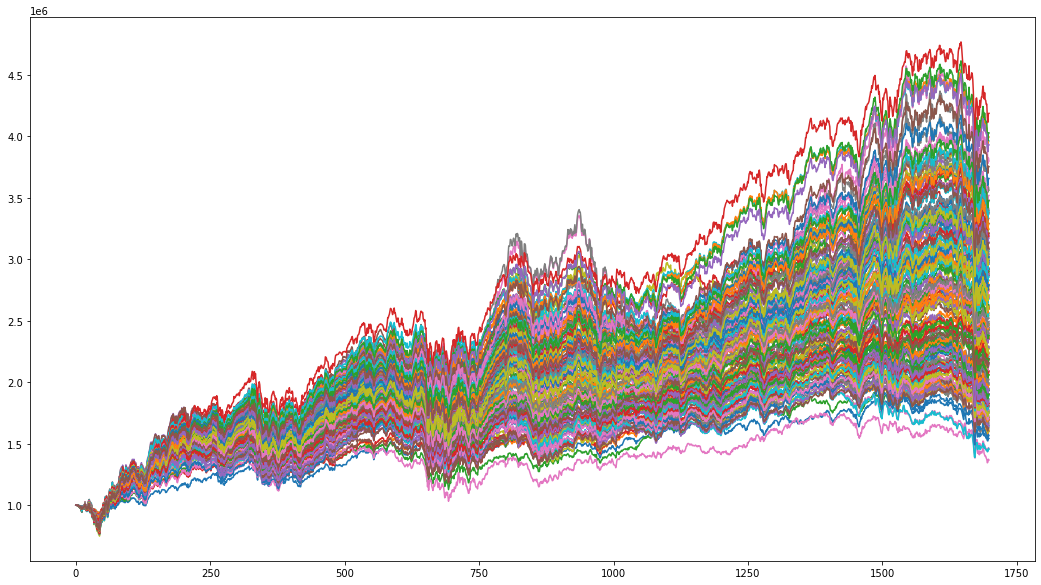

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline


data = pd.read_csv('./results/account_value_train.csv')
plt.figure(figsize=(18, 10))
for col in data.columns[1:]:
    plt.plot(data[col].index, data[col], label=col)

plt.show()

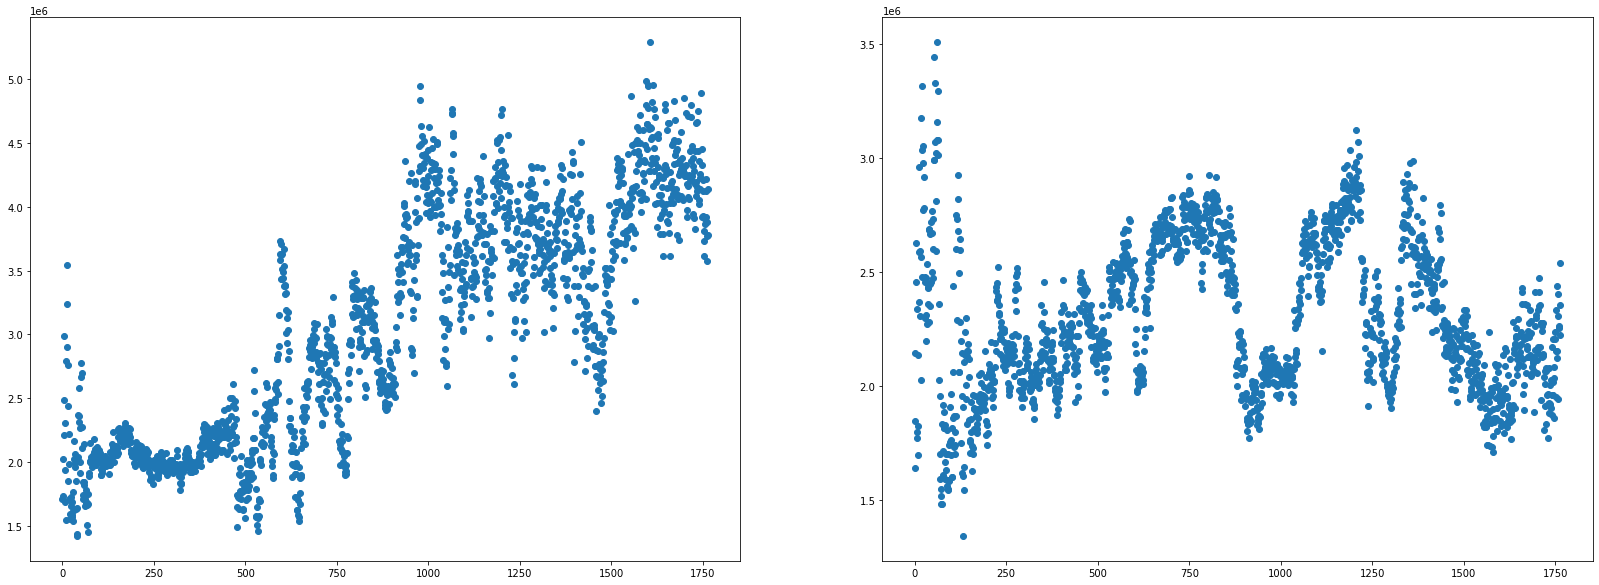

In [18]:
data = pd.read_csv('./results/account_value_train_A2C.csv')
data_2 = pd.read_csv('./results/account_value_train_A2C_3x128.csv')

import matplotlib.pyplot as plt

%matplotlib inline

fig, axs = plt.subplots(1, 2, figsize=(28, 10))
axs[0].scatter(x=range(len(data.iloc[-1, 1:].index)), y=data.iloc[-1, 1:])
axs[1].scatter(x=range(len(data_2.iloc[-1, 1:].index)), y=data_2.iloc[-1, 1:])



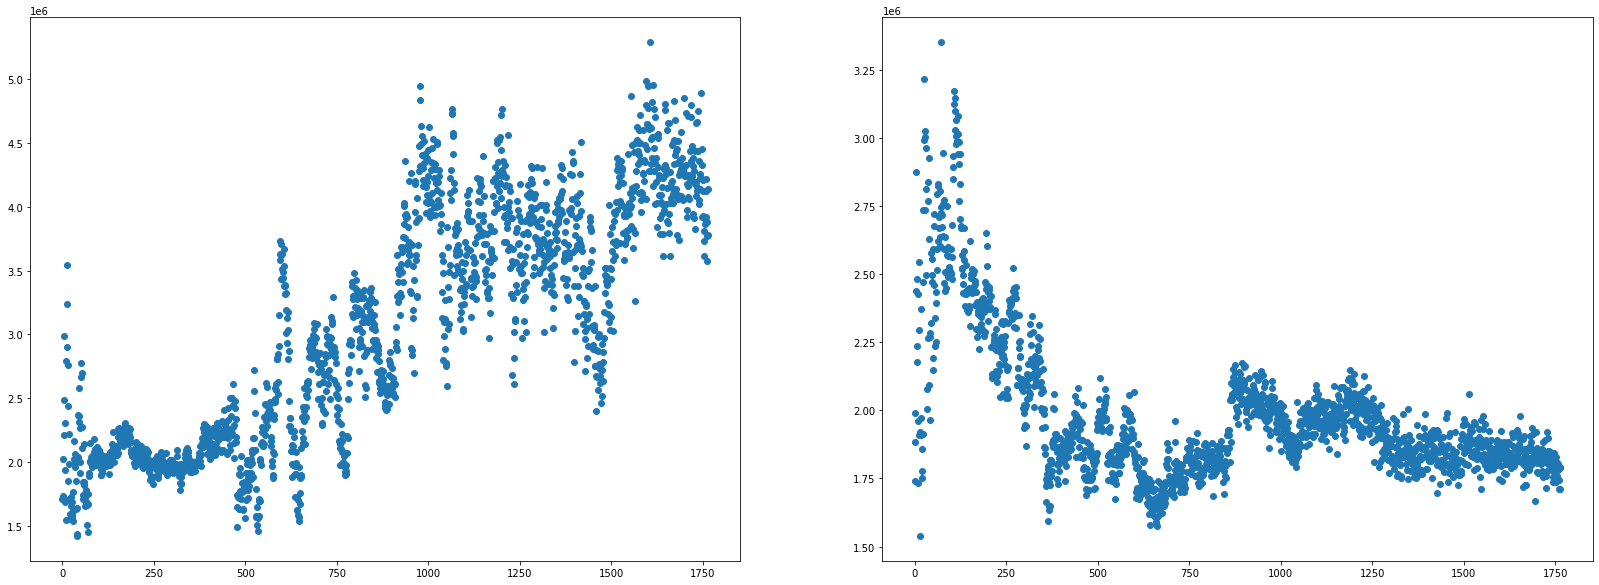

In [20]:
data = pd.read_csv('./results/account_value_train_A2C.csv')
data_2 = pd.read_csv('./results/account_value_train_A2C_3x128.csv')

import matplotlib.pyplot as plt

%matplotlib inline

fig, axs = plt.subplots(1, 2, figsize=(28, 10))
axs[0].scatter(x=range(len(data.iloc[-1, 1:].index)), y=data.iloc[-1, 1:])
axs[1].scatter(x=range(len(data_2.iloc[-1, 1:].index)), y=data_2.iloc[-1, 1:])

